# Real-time Ad Bidding Price Predictor
_Authors: Eric Tran (Los Angeles)_

The task in this dataset is to predict the base price an advertiser would need to pay to win an auction for their ad to be served on a publisher's website. The publisher's objective is to determine a reserve price for their inventory to maximize revenue. Predict next month's reserve base prices for each advertiser-publisher. minimum (reserve) price set by the Publisher

<img src="https://www.match2one.com/wp-content/uploads/2019/01/Programmatic-ecosystem-white.png" width="1000" height="700" align="left"/>


**Programmatic Advertising Workflow**

A typical transaction process on the RTB market is as follows. 

1. An Internet user visits one of the advertising spaces displayed by the Publisher, most often through a web browser or mobile application. 
2. The Publisher passes this information (so-called bid request: (1)) to the Supply Side Platform (SSP) enhanced by a description of the available advertisement inventories.
3. The SSP platform transmits this information to Ad Exchange, which initiates the auction: it distributes information about inventories, enriched with user data (demography, behavioral profile) obtained from Data Management Platforms (DMP), among many Demand Side Platforms (DSP) waiting for the Advertisers’ offers.
4. On the DSP, the bid request is initially adjusted to the previously registered space and user requirements (advertising campaigns). Advertisers receive bidding data and, most often using the algorithms implemented in their systems, specify the price they are willing to pay (so-called bid response: (2)). Bid responses are transmitted, via the DSP, to the Ad Exchange, where the auction is finalized (3), and the so-called win notice is transmitted to the Advertiser.
5. The Advertiser passes his advertisement (via DSP, Ad Exchange, and SSP) to the Publisher, who emits it on the indicated inventory. After the emission, its details, in particular information about the user feedback (5), are forwarded to the Advertiser. The transaction is finalized, the auction ends. The whole process (from the user entering the Publisher website to the display of the advertisement) takes about 0.1 sec.

The main objective of the Publishers is to maximize the revenue from the sale of their advertising space, both in off-line channels (e.g., via direct contracts) and online (e.g., on RTB markets). For this to happen, they need to determine the sweat spot or reserve price they must set for their ad inventory. Too low a price generates a risk of loss of profit, too high - a risk of low ad utilization.

### About the Dataset

- This data was uploaded to Kaggle on 2020-06-02 by Saurav Anand.
- Each row in the data represents the actual revenue generated by a publisher, and not at the bid level.
- The featurers of the ads are:

| Key | Value Type | Definition |
| :- | :- | :- |
| date | string | The date the ad was served on |
| advertiser_id | integer |  each id denotes a different bidder in the auction |
| order_id | integer | each id denotes an order generated at the time of creation. Each order ID is useful to ensure you and others are referring to the same Advertiser campaign. |
| line_item_type_id | integer | line items contain information about how specific ads are served on a website along with pricing and other delivery details. For example: Sponsorship, Standard, Network, Bulk, Price Priority. Line item types also have different priorities, or how a line item competes with other line items. Not all line items have the same importance. Some line items may be contractually guaranteeded to serve or may promise more revenue than others. These can be priotiezed higher than other line items. |
| monetization_channel_id | integer |  it describes the mode through which demand partner integrates with a particular publisher - it can be header bidding (running via prebid.js), dynamic allocation, exchange bidding, direct etc |
| site_id | integer | each id denotes a different website |
| ad_type_id | integer | each id denotes a different ad_type. These can be display ads , video ads, text ads etc |
| ad_unit_id | integer | each id denotes a different ad unit (one page can have more than one ad units) | 
| geo_id | integer |  each id denotes a different country. our maximum traffic is from english speaking countries |
| device_category_id | integer | each id denoted a different device_category like desktop , mobile, tablet |
| os_id | integer | each id denotes a different operating system for mobile device category only (android , ios etc) . for all other device categories, osid will correspond to not_mobile |
| integration_type_id | integer |  it describes how the demand partner is setup within a publisher's ecosystem - can be adserver (running through the publisher adserver) or hardcoded |
| total_impressions | float | measurement column measuring the impressions for the particular set of dimensions |
| viewable_impressions | float | Number of impressions on the site that were viewable out of all measurable impressions. A display ad is counted as viewable if at least 50% of its area was displayed on screen for at least one second |
| measureable_impressions | float | Impressions that were measurable by Active View out of the total number of eligible impressions. This value should generally be close to 100%. For example, an impression that is rendering in a cross-domain iframe may not be measurable. Active View is a technology on YouTube and certain Display Network websites and mobile apps that allows Google Ads to determine if your ad is viewable by potential customers. |
| total_revenue | float | measurement column measuring the revenue for the particular set of dimensions |
| revenue_share_percentage | float | not every advertiser gives all the revenue to the publisher. They charge a certain share for the services they provide. This captures the fraction of revenue that will actually reach the publishers pocket |
| cpm | float | CPM: cost-per-thousand impressions. A measure that calculates the Adverrtiser's cost for 1000 impressions

### Import Libraries

In [3]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#show plots in Jupyter Notebook browser
%matplotlib inline 

# Jupyter enviornment
from IPython.core.display import display, HTML

# Datetime
import datetime

### Configure Jupyter Enviornment

In [4]:
# Set pandas display configurations with more rows, columns, and greater column width
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', 255)

# Expand the jupyter container to have more working space
display(HTML("<style>.container {width:80% !important} </style>"))

# Configure Plot Size
# print(plt.style.available)
plt.style.use('ggplot')

### Load the Data

In [5]:
relative_path = '../data/rtb-ad-dataset.csv'
ads_df = pd.read_csv(relative_path)

### Examine the Data

In [6]:
# Return the first 3 rows
ads_df.head(3)

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1


### Shape of Data

In [7]:
ads_df.shape

(567291, 17)

### Schema

In [8]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int64  
 2   ad_type_id               567291 non-null  int64  
 3   geo_id                   567291 non-null  int64  
 4   device_category_id       567291 non-null  int64  
 5   advertiser_id            567291 non-null  int64  
 6   order_id                 567291 non-null  int64  
 7   line_item_type_id        567291 non-null  int64  
 8   os_id                    567291 non-null  int64  
 9   integration_type_id      567291 non-null  int64  
 10  monetization_channel_id  567291 non-null  int64  
 11  ad_unit_id               567291 non-null  int64  
 12  total_impressions        567291 non-null  int64  
 13  total_revenue            567291 non-null  float64
 14  view

### Check for Missing Values

In [9]:
# There are no missing data in our dataset - score!
ads_df.isnull().sum()

date                       0
site_id                    0
ad_type_id                 0
geo_id                     0
device_category_id         0
advertiser_id              0
order_id                   0
line_item_type_id          0
os_id                      0
integration_type_id        0
monetization_channel_id    0
ad_unit_id                 0
total_impressions          0
total_revenue              0
viewable_impressions       0
measurable_impressions     0
revenue_share_percent      0
dtype: int64

### Enrich the Data
Lets convert the date from string to datetime data type

In [10]:
# Replace existing date column with datetime
ads_df['date'] = pd.to_datetime(ads_df['date'])

Now lets create a function that will extract the Year, Month, Day, Weekday, and Day of Week

In [11]:
# Create a function to extract the Year, Month, Day, Weekday, and Day Of Week
def get_date_attributes(df):
    
    # Retrieve year of date
    ads_df['year'] = ads_df['date'].apply(lambda x: x.year)
    
    # Retrieve month of date
    ads_df['month'] = ads_df['date'].apply(lambda x: x.month)
    
    # Retrieve day of date
    ads_df['day'] = ads_df['date'].apply(lambda x: x.day)
    
    # Retrieve month of date
    ads_df['weekday'] = ads_df['date'].apply(lambda x: x.weekday())    

    # Retrieve month of date
    ads_df['day_of_week'] = ads_df['date'].apply(lambda x: x.strftime("%A"))
    
# Retrieve date attributes
get_date_attributes(ads_df)

### Compute the CPM

In programmatic advertising, CPM is the most common online advertising pricing model. The CPM model compensates the publishers for every 1000 views (impressions) an advertisement receives. Advertisers will pay you for each impression you deliver. CPM is calculated by dividing the total cost to the advertiser by the number of impressions received on the advefrtisement and multiplying the result by 1000.

- _CPM = (Cost to the Advertiser / No. of Impressions) x 1000_

In [12]:
# Calculate the CPM. TCPM = (total_revenue / measurable_impressions) x revenue_share_percent x 1000. 
def revenue_per_impression(r, i):
    return r / i if i else 0

ads_df['revenue_per_imp'] = ads_df.apply(lambda x: revenue_per_impression(((x['total_revenue'])*x['revenue_share_percent']),
                                                                          x['measurable_impressions']) , axis=1)
ads_df['CPM'] = ads_df['revenue_per_imp'].apply(lambda x: x*1000)

#### Summary Statistics of DataFrame

In [13]:
# Return the summary statistics to examine the spread, range, and any outliers in the data
ads_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
site_id,567291.0,347.11,2.93,342.00,345.0,346.0,350.00,351.00
ad_type_id,567291.0,10.22,1.22,10.00,10.0,10.0,10.00,17.00
geo_id,567291.0,110.23,66.18,1.00,39.0,122.0,183.00,308.00
device_category_id,567291.0,1.90,0.79,1.00,1.0,2.0,3.00,5.00
advertiser_id,567291.0,262.08,627.33,8.00,79.0,88.0,139.00,2646.00
order_id,567291.0,1951.27,1652.55,45.00,45.0,3438.0,3460.00,3489.00
line_item_type_id,567291.0,12.63,6.81,3.00,4.0,11.0,19.00,20.00
os_id,567291.0,57.22,1.96,15.00,56.0,57.0,58.00,60.00
integration_type_id,567291.0,1.00,0.00,1.00,1.0,1.0,1.00,1.00
monetization_channel_id,567291.0,14.43,7.14,1.00,4.0,19.0,19.00,21.00


### Exploratory Data Analysis (EDA)

Note: Here are some things to consider in your notebook: 
- sample size
- correlations
- feature importance
- unexplained variance or outliers
- variable selection
- train/test comparison
- relationships between your target and independent variables.

#### Check for Outliers

In [12]:
# There is one observation with negative CPM values
ads_df[ads_df['CPM'] < 0]

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent,year,month,day,weekday,day_of_week,revenue_per_imp,CPM
109144,2019-06-24,351,10,113,2,79,3487,8,58,1,19,5179,22,-0.1542,8,22,1,2019,6,24,0,Monday,-0.007009,-7.009091


In [13]:
# There are 28,364 observations with CPMs that fall above the 95% quantile
ads_df[ads_df['CPM'] > ads_df['CPM'].quantile(.95)].sort_values('CPM', ascending=False)

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent,year,month,day,weekday,day_of_week,revenue_per_imp,CPM
382726,2019-06-11,342,10,187,3,79,3438,8,55,1,19,5060,2,5.6724,2,2,1,2019,6,11,1,Tuesday,2.83620,2836.200000
254342,2019-06-17,351,10,96,2,79,3487,8,58,1,19,5179,4,4.2088,4,4,1,2019,6,17,0,Monday,1.05220,1052.200000
439872,2019-06-08,350,10,11,1,79,3485,8,56,1,19,5168,4,4.0460,2,4,1,2019,6,8,5,Saturday,1.01150,1011.500000
24853,2019-06-29,346,10,187,1,79,3460,8,56,1,19,5114,2,1.8390,0,2,1,2019,6,29,5,Saturday,0.91950,919.500000
459870,2019-06-07,350,10,33,1,79,3485,8,56,1,19,5168,2,1.8018,2,2,1,2019,6,7,4,Friday,0.90090,900.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275848,2019-06-16,351,10,187,1,88,152,19,56,1,4,5178,88,0.4638,22,88,1,2019,6,16,6,Sunday,0.00527,5.270455
30943,2019-06-29,343,10,187,2,88,152,19,58,1,4,5066,114,0.6008,74,114,1,2019,6,29,5,Saturday,0.00527,5.270175
21966,2019-06-29,349,10,187,2,79,3476,20,60,1,19,5159,2838,14.9566,2180,2838,1,2019,6,29,5,Saturday,0.00527,5.270120
519797,2019-06-03,349,10,187,2,79,3476,20,60,1,19,5159,3556,18.7394,2408,3556,1,2019,6,3,0,Monday,0.00527,5.269798


Lets examine the unique values for each column of the dataframe. We can do this by looping through each column of the dataframe and using the .unique() and len() methods.

In [14]:
for col in ads_df.columns:
    print("{}: {} \n".format(col, ads_df[col].unique()))
    print("Unique Records: {} \n".format(len(ads_df[col].unique())))
    print("==="*23)

date: ['2019-06-30T00:00:00.000000000' '2019-06-29T00:00:00.000000000'
 '2019-06-28T00:00:00.000000000' '2019-06-27T00:00:00.000000000'
 '2019-06-26T00:00:00.000000000' '2019-06-25T00:00:00.000000000'
 '2019-06-24T00:00:00.000000000' '2019-06-23T00:00:00.000000000'
 '2019-06-22T00:00:00.000000000' '2019-06-21T00:00:00.000000000'
 '2019-06-20T00:00:00.000000000' '2019-06-19T00:00:00.000000000'
 '2019-06-18T00:00:00.000000000' '2019-06-17T00:00:00.000000000'
 '2019-06-16T00:00:00.000000000' '2019-06-15T00:00:00.000000000'
 '2019-06-14T00:00:00.000000000' '2019-06-13T00:00:00.000000000'
 '2019-06-12T00:00:00.000000000' '2019-06-11T00:00:00.000000000'
 '2019-06-10T00:00:00.000000000' '2019-06-09T00:00:00.000000000'
 '2019-06-08T00:00:00.000000000' '2019-06-07T00:00:00.000000000'
 '2019-06-06T00:00:00.000000000' '2019-06-05T00:00:00.000000000'
 '2019-06-04T00:00:00.000000000' '2019-06-03T00:00:00.000000000'
 '2019-06-02T00:00:00.000000000' '2019-06-01T00:00:00.000000000'] 

Unique Records: 

In [14]:
# Lets check out work using the nunique() method
ads_df.nunique()

date                          30
site_id                       10
ad_type_id                     2
geo_id                       219
device_category_id             5
advertiser_id                 23
order_id                      75
line_item_type_id              7
os_id                          7
integration_type_id            1
monetization_channel_id        5
ad_unit_id                   132
total_impressions           1979
total_revenue              10099
viewable_impressions        1159
measurable_impressions      1884
revenue_share_percent          1
year                           1
month                          1
day                           30
weekday                        7
day_of_week                    7
revenue_per_imp            35643
CPM                        35594
dtype: int64

Check the spread of our data using the .skew() and .kurtosis() methods

In [15]:
skew = ads_df['CPM'].skew().round(2)
kurtosis = ads_df['CPM'].kurtosis().round(2)

print("Skew: {}".format(skew))
print("Kurtosis: {}".format(kurtosis))

Skew: 148.86
Kurtosis: 42828.92


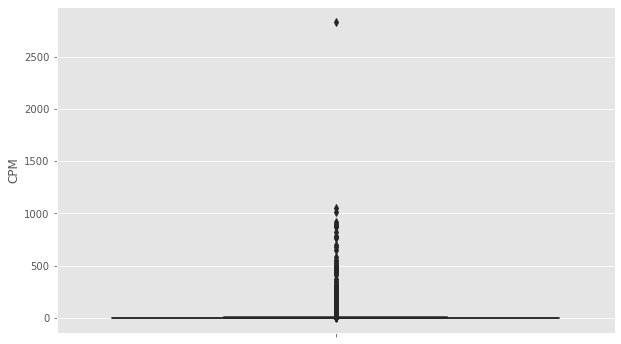

In [16]:
# Vertical Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(ads_df['CPM'], color='green', orient='v');

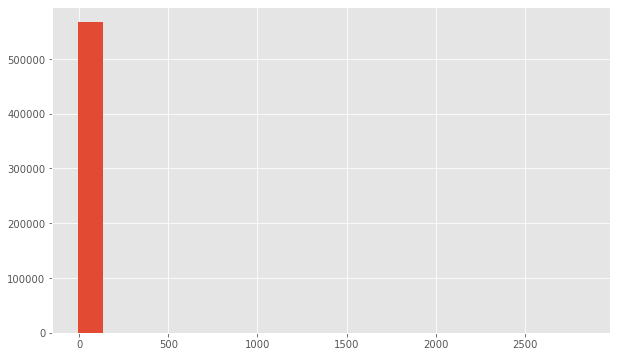

In [17]:
# Histogram
ads_df['CPM'].hist(figsize=(10,6), bins=20);

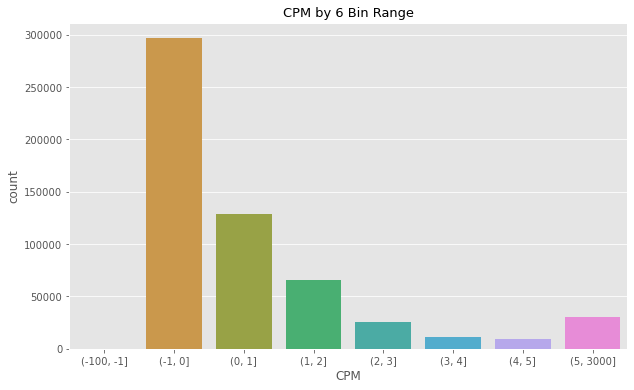

In [21]:
# Group by our CPM's into our own bins
plt.figure(figsize=(10,6))
sns.countplot(pd.cut(ads_df.loc[:, 'CPM'], [-100, -1, 0, 1, 2, 3, 4, 5, 3000]))
plt.title('CPM by 6 Bin Range', fontsize=13);

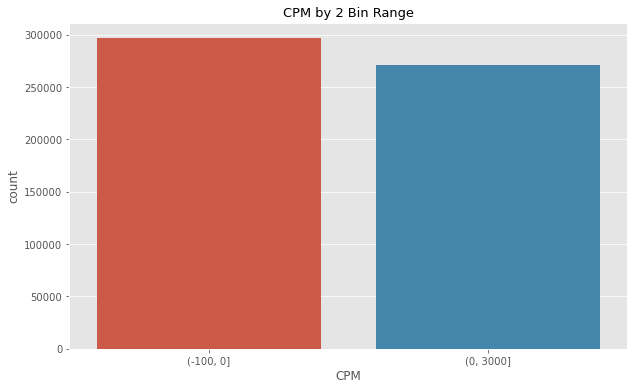

In [22]:
# Group by our CPM's into only three bins
plt.figure(figsize=(10,6))
sns.countplot(pd.cut(ads_df.loc[:, 'CPM'], [-100, 0, 3000]))
plt.title('CPM by 2 Bin Range', fontsize=13);

**Observations:** Most of the observations have 0 CPM.

### Aggregations

#### Advertiser

In [21]:
# There are different CPM's depending on the operating system
ads_df_os = ads_df.groupby('os_id')['CPM'].mean()
ads_df_os

os_id
15    1.156096
55    1.336994
56    1.385174
57    0.951987
58    1.065706
59    0.903146
60    0.765107
Name: CPM, dtype: float64

In [22]:
# There are also different CPM's depending on the device type
ads_df_device = ads_df.groupby('device_category_id')['CPM'].mean()
ads_df_device

device_category_id
1    1.386776
2    0.964892
3    1.137960
4    0.000000
5    1.212410
Name: CPM, dtype: float64

In [23]:
# Line item types of 3, 9, 11 have impressions but no CPM values. This could mean these are network ads or house ads
ads_df_lineitem = ads_df.groupby(['line_item_type_id'])[['CPM']].agg(['count', 'mean', 'min', 'max']).round(2)
ads_df_lineitem

CPM                    
                    count  mean   min     max
line_item_type_id                            
3                     258  0.00  0.00     0.0
4                  146034  0.04  0.00    34.3
8                  122568  0.85 -7.01  2836.2
9                    1501  0.00  0.00     0.0
11                  20590  0.00  0.00     0.0
19                 166187  2.31  0.00    35.0
20                 110153  1.49  0.00   105.4

In [24]:
# The position of ad slots have different CPM values as well
ads_df_adunit = ads_df.groupby('ad_unit_id')[['CPM']].agg(['count', 'mean', 'min', 'max']).round(2)
ads_df_adunit

CPM                     
            count  mean   min      max
ad_unit_id                            
5050         2325  3.45  0.00   879.03
5051         1774  0.59  0.00    90.90
5052         2611  2.09  0.00   470.80
5053         2574  1.84  0.00    38.53
5054         1095  1.30  0.00    38.60
5055         2493  2.01  0.00   144.40
5056         1807  0.00  0.00     0.00
5057         2637  1.85  0.00    45.31
5058         1884  0.00  0.00     0.00
5059         2670  1.76  0.00   244.97
5060          881  3.90  0.00  2836.20
5061         1049  1.47  0.00   152.00
5062         1061  1.56  0.00    59.35
5063         2431  0.01  0.00     3.20
5064         4689  2.18  0.00   463.60
5065         5183  1.60  0.00    46.80
5066         5575  1.82  0.00   501.10
5067         5361  1.35  0.00   143.80
5068         5256  1.52  0.00    24.30
5069         2181  1.43  0.00    30.62
5070         6515  1.34  0.00   104.55
5071         3202  0.35  0.00    46.80
5072         2222  1.37  0.00    20.00
5073         6486  1.27  0.00    32.80
5074         5983  1.16  0.00    60.06
5076         3713  0.00  0.00     2.65
5078           31  0.72  0.00     2.00
5079         3222  0.00  0.00     0.00
5080         2462  1.39  0.00   325.10
5081         3142  2.01  0.00   279.03
5082         3308  1.41  0.00   252.97
5083         2165  2.52  0.00   584.60
5084         1102  1.23  0.00    83.17
5085         2297  0.45  0.00    30.71
5086         3196  1.59  0.00    99.45
5087         3285  1.09  0.00    33.72
5088         1115  1.04  0.00   145.15
5089         1112  1.43  0.00   433.40
5090         2456  0.91  0.00    90.97
5091         2395  0.97  0.00   283.20
5092          847  1.18  0.00   354.35
5093         2449  0.95  0.00   173.15
5094           39  0.21  0.00     3.60
5095         2569  0.00  0.00     0.00
5096         6776  1.13  0.00    20.00
5097         6158  1.36  0.00    24.00
5098         3165  0.52  0.00    20.00
5099         5493  1.66  0.00    24.00
5100         5780  1.12  0.00    28.70
5101         5898  1.14  0.00    28.90
5102         5774  1.60  0.00    24.00
5103         2687  1.52  0.00    20.00
5104         1629  0.88  0.00    40.70
5105         6594  0.98  0.00    20.00
5106         2932  1.51  0.00    20.00
5107          313  1.00  0.00    16.60
5108         3884  1.31  0.00   139.42
5109        10459  1.21  0.00   218.97
5110         7712  1.25  0.00    71.18
5111         7081  1.86  0.00   529.60
5112         4654  0.60  0.00   548.30
5113         7584  1.44  0.00   136.50
5114        11484  1.04  0.00   919.50
5115         6821  0.00  0.00     0.40
5116         7752  1.37  0.00    95.85
5117         3614  1.40  0.00   218.03
5118        10594  0.67  0.00    58.00
5119         3764  1.35  0.00   132.33
5120        11477  0.84  0.00    27.30
5121          978  0.76  0.00    42.56
5122         1989  0.38  0.00    15.20
5123         1144  0.73  0.00    34.30
5124         2314  0.46  0.00    17.70
5125         1755  6.29  0.00    84.70
5126         2814  1.68  0.00    20.00
5127         2770  0.53  0.00    99.54
5128         1172  0.82  0.00    17.90
5129         3222  1.64  0.00    20.00
5130         2756  0.62  0.00    99.54
5131         2268  0.47  0.00    20.70
5132         2455  1.03  0.00    20.00
5133         1098  0.89  0.00    20.00
5134         1081  0.91  0.00    20.00
5135           26  0.14  0.00     1.50
5136         2606  0.00  0.00     0.00
5137         2136  0.06  0.00    40.60
5138          603  0.84  0.00    18.90
5139          768  0.49  0.00    20.00
5140         1662  1.46  0.00    20.00
5141         1656  1.55  0.00    20.00
5142          606  0.85  0.00    18.90
5143         1273  0.00  0.00     2.50
5144          606  0.88  0.00    18.90
5145         1407  1.30  0.00    20.00
5146          573  1.14  0.00    20.00
5147         1420  1.47  0.00    20.00
5148          565  0.00  0.00     0.00
5150           16  0.00  0.00     0.00
5151         2004  0.00  0.00     0.00
5152         1884  2.01  0.00    46.

In [25]:
# There are multiple advertiser's with order_ids that have no CPM value - 84, 2643, 2645, 2646
ads_df_advertiser = ads_df.groupby(['advertiser_id','order_id'])[['CPM']].agg(['count', 'mean', 'min', 'max']).round(2)
ads_df_advertiser

CPM                       
                         count   mean    min      max
advertiser_id order_id                               
8             140        10857   1.89   0.00    35.00
16            3462        5976   3.62   0.00    99.54
              3489       13593   1.44   0.00   105.40
79            3438        9186   1.42   0.00  2836.20
              3439        6457   1.54   0.00    24.47
              3441        9988   1.31   0.00    46.80
              3442       15898   0.47   0.00   501.10
              3446       10463   0.83   0.00   787.18
              3452       10520   1.10   0.00   584.60
              3453        7346   1.45   0.00    24.00
              3454        1914   9.92   0.00    26.67
              3455       14893   1.46   0.00    70.40
              3456        7886   1.46   0.00    72.05
              3457        1003   0.50   0.00     0.75
              3458          27   1.41   0.00     2.00
              3459       16101   1.22   0.00    40.70
              3460       30490   0.56   0.00   919.50
              3461         603   0.00   0.00     0.00
              3463          73   1.59   0.00    40.60
              3464       11831   1.00   0.00    41.10
              3475        8727   1.31   0.00   877.10
              3476        5713   2.18   0.00    56.40
              3477       10289   0.46   0.00   873.70
              3478        5160   0.66   0.00    53.90
              3485       18062   0.68   0.00  1011.50
              3487       22703   0.77  -7.01  1052.20
              3488        5136   1.77   0.00   105.40
84            3465          17   0.00   0.00     0.00
              3466           9   0.00   0.00     0.00
              3467          19   0.00   0.00     0.00
              3468           6   0.00   0.00     0.00
              3469           9   0.00   0.00     0.00
              3470           1   0.00   0.00     0.00
              3471           7   2.00   2.00     2.00
              3472           6   0.00   0.00     0.00
              3473        4284   0.00   0.00     0.00
88            147        41580   0.52   0.00     5.45
              152         5041   5.42   0.00    18.10
              161         2208   9.55   8.00    20.40
              162         1274  19.12   0.00    30.00
              172         1047  13.78   0.00    29.30
90            148        12327   1.82   0.00     5.00
              157          707  19.16  16.00    20.00
              158         4624   5.46   0.00    11.90
              163         1920   9.43   8.00    12.20
              169          785  13.63  12.00    27.30
96            146        15984   0.92   0.00     7.10
              151         2634   5.32   0.00     9.45
              155          836   9.45   8.00    17.50
              175          379  18.95  16.00    20.00
              177          293  13.74   0.00    15.90
97            170           13   0.82   0.10     3.10
              2750       20182   0.49   0.00     4.60
              2751        2979   5.42   0.00    10.50
              2752        1445   9.66   0.00    21.10
              2753         793  13.69   0.00    21.00
              2754        1016  18.95   0.00    23.70
139           45        146034   0.04   0.00    34.30
2089          3445        2780   0.00   0.00     0.00
2634          3482       11261   1.75   0.00     4.00
2635          3474          88   0.00   0.00     0.00
2636          3447         579   0.00   0.00     0.00
              3448        2817   0.00   0.00     0.00
              3449        1490   0.00   0.00     0.00
              3450         258   0.00   0.00     0.00
2637          3479        2471   0.00   0.00     0.00
2638          3483         323   0.00   0.00     0.00
2639          3444        2486   0.00   0.00     0.00
2640          3486         876   0.00   0.00     0.00
2641          3484        1045   0.00   0.00     0.00
2642          3481         378   0.00   0.00     0.00
2643          3480         922 

In [26]:
# There are multi a few advertisers running ads with line_item_type_id 3, 9, 11 where there is 0 CPM
ads_df_advertiser = ads_df.groupby(['advertiser_id', 'line_item_type_id'])[['CPM']].agg(['count', 'mean', 'min', 'max']).round(2)
ads_df_advertiser

CPM                     
                                  count  mean   min      max
advertiser_id line_item_type_id                             
8             19                  10857  1.89  0.00    35.00
16            20                  19569  2.10  0.00   105.40
79            8                  122568  0.85 -7.01  2836.20
              19                  17317  1.13  0.00    26.67
              20                  90584  1.36  0.00   105.40
84            19                   4358  0.00  0.00     2.00
88            19                  51150  2.13  0.00    30.00
90            19                  20363  4.42  0.00    27.30
96            19                  20126  2.38  0.00    20.00
97            19                  26428  2.65  0.00    23.70
139           4                  146034  0.04  0.00    34.30
2089          11                   2780  0.00  0.00     0.00
2634          19                  11261  1.75  0.00     4.00
2635          11                     88  0.00  0.00     0.00
2636          3                     258  0.00  0.00     0.00
              9                     579  0.00  0.00     0.00
              11                   4307  0.00  0.00     0.00
2637          11                   2471  0.00  0.00     0.00
2638          11                    323  0.00  0.00     0.00
2639          11                   2486  0.00  0.00     0.00
2640          11                    876  0.00  0.00     0.00
2641          11                   1045  0.00  0.00     0.00
2642          11                    378  0.00  0.00     0.00
2643          9                     922  0.00  0.00     0.00
2644          19                   4327  1.50  0.00     3.00
2645          11                   2893  0.00  0.00     0.00
2646          11                   2943  0.00  0.00     0.00

In [27]:
# There are multi a few advertisers running ads with line_item_type_id 3, 9, 11 where there is 0 CPM
ads_df_advertiser = ads_df.groupby(['advertiser_id', 'line_item_type_id', 'ad_unit_id', 'site_id'])[['CPM']].agg(['count', 'mean', 'min', 'max']).round(2)
ads_df_advertiser

CPM               \
                                                    count   mean   min   
advertiser_id line_item_type_id ad_unit_id site_id                       
8             19                5064       343        192   2.42  0.20   
                                5065       343        202   2.15  0.20   
                                5066       343        159   2.34  0.20   
                                5067       343        250   1.68  0.20   
                                5068       343        201   2.06  0.20   
                                5069       343        127   2.65  0.00   
                                5070       343        216   1.83  0.20   
                                5071       343         52   2.44  0.20   
                                5072       343        130   2.60  0.00   
                                5073       343        220   1.82  0.20   
                                5074       343        223   1.14  0.20   
                                5096       345        246   1.26  0.20   
                                5097       345        231   1.25  0.20   
                                5098       345         30   3.77  0.20   
                                5099       345        236   1.80  0.20   
                                5100       345        114   2.16  0.20   
                                5101       345        184   1.58  0.20   
                                5102       345        250   1.43  0.20   
                                5103       345        136   2.38  0.00   
                                5104       345         21   2.08  0.00   
                                5105       345        293   0.87  0.00   
                                5106       345        142   1.85  0.00   
                                5108       346        170   2.11  0.00   
                                5109       346        315   1.28  0.20   
                                5110       346        268   1.52  0.20   
                                5111       346        250   2.05  0.20   
                                5112       346         41   3.36  0.20   
                                5113       346        274   1.65  0.20   
                                5114       346        317   1.37  0.20   
                                5116       346        266   1.52  0.20   
                                5117       346        146   2.41  0.00   
                                5118       346        399   0.92  0.20   
                                5119       346        167   2.18  0.00   
                                5120       346        318   1.30  0.20   
                                5152       349         98   3.10  0.20   
                                5153       349        247   1.23  0.20   
                                5154       349        207   2.32  0.20   
                                5155       349        149   2.37  0.20   
                                5156       349        141   2.57  0.20   
                                5157       349        145   2.40  0.20   
                                5158       349        143   1.84  0.30   
                                5159       349        147   3.56  0.20   
                                5160       349         30   2.72  0.20   
                                5161       349        203   2.23  0.20   
                                5162       349        151   2.08  0.20   
                                5163       349        198   1.99  0.00   
                                5164       349        210   1.94  0.20   
                                5168       350          2   3.10  3.00   
                                5170       351         75   2.93  0.20   
                                5171       351        404   1.58  0.20   
                                5172       351         25   3.61  0.00   
                                5173       351        148 

#### Publisher

In [28]:
# Ad_unit_ids are unique to each publisher website
ads_df_publisher = ads_df.groupby(['site_id'])[['CPM']].agg(['count', 'mean', 'min', 'max']).round(2)
ads_df_publisher

CPM                     
          count  mean   min      max
site_id                             
342       27292  1.54  0.00  2836.20
343       59619  1.26  0.00   501.10
344       33939  1.22  0.00   584.60
345       62520  1.36  0.00    40.70
346      105889  0.99  0.00   919.50
347       29470  1.13  0.00    99.54
348       15295  0.76  0.00    40.60
349       44773  2.13  0.00   877.10
350       89995  0.83  0.00  1011.50
351       98499  0.97 -7.01  1052.20

In [29]:
# Ad_unit_ids are unique to each publisher website
ads_df_placement = ads_df.groupby(['site_id','ad_unit_id'])[['CPM']].agg(['count', 'mean', 'min', 'max']).round(2)
ads_df_placement

CPM                     
                    count  mean   min      max
site_id ad_unit_id                            
342     5050         2325  3.45  0.00   879.03
        5051         1774  0.59  0.00    90.90
        5052         2611  2.09  0.00   470.80
        5053         2574  1.84  0.00    38.53
        5054         1095  1.30  0.00    38.60
        5055         2493  2.01  0.00   144.40
        5056         1807  0.00  0.00     0.00
        5057         2637  1.85  0.00    45.31
        5058         1884  0.00  0.00     0.00
        5059         2670  1.76  0.00   244.97
        5060          881  3.90  0.00  2836.20
        5061         1049  1.47  0.00   152.00
        5062         1061  1.56  0.00    59.35
        5063         2431  0.01  0.00     3.20
343     5064         4689  2.18  0.00   463.60
        5065         5183  1.60  0.00    46.80
        5066         5575  1.82  0.00   501.10
        5067         5361  1.35  0.00   143.80
        5068         5256  1.52  0.00    24.30
        5069         2181  1.43  0.00    30.62
        5070         6515  1.34  0.00   104.55
        5071         3202  0.35  0.00    46.80
        5072         2222  1.37  0.00    20.00
        5073         6486  1.27  0.00    32.80
        5074         5983  1.16  0.00    60.06
        5076         3713  0.00  0.00     2.65
        5078           31  0.72  0.00     2.00
        5079         3222  0.00  0.00     0.00
344     5080         2462  1.39  0.00   325.10
        5081         3142  2.01  0.00   279.03
        5082         3308  1.41  0.00   252.97
        5083         2165  2.52  0.00   584.60
        5084         1102  1.23  0.00    83.17
        5085         2297  0.45  0.00    30.71
        5086         3196  1.59  0.00    99.45
        5087         3285  1.09  0.00    33.72
        5088         1115  1.04  0.00   145.15
        5089         1112  1.43  0.00   433.40
        5090         2456  0.91  0.00    90.97
        5091         2395  0.97  0.00   283.20
        5092          847  1.18  0.00   354.35
        5093         2449  0.95  0.00   173.15
        5094           39  0.21  0.00     3.60
        5095         2569  0.00  0.00     0.00
345     5096         6776  1.13  0.00    20.00
        5097         6158  1.36  0.00    24.00
        5098         3165  0.52  0.00    20.00
        5099         5493  1.66  0.00    24.00
        5100         5780  1.12  0.00    28.70
        5101         5898  1.14  0.00    28.90
        5102         5774  1.60  0.00    24.00
        5103         2687  1.52  0.00    20.00
        5104         1629  0.88  0.00    40.70
        5105         6594  0.98  0.00    20.00
        5106         2932  1.51  0.00    20.00
        5107          313  1.00  0.00    16.60
        5183         3472  0.00  0.00     0.00
        5443         5849  3.25  0.00    26.67
346     5108         3884  1.31  0.00   139.42
        5109        10459  1.21  0.00   218.97
        5110         7712  1.25  0.00    71.18
        5111         7081  1.86  0.00   529.60
        5112         4654  0.60  0.00   548.30
        5113         7584  1.44  0.00   136.50
        5114        11484  1.04  0.00   919.50
        5115         6821  0.00  0.00     0.40
        5116         7752  1.37  0.00    95.85
        5117         3614  1.40  0.00   218.03
        5118        10594  0.67  0.00    58.00
        5119         3764  1.35  0.00   132.33
        5120        11477  0.84  0.00    27.30
        5121          978  0.76  0.00    42.56
        5442         8031  0.00  0.00     0.00
347     5122         1989  0.38  0.00    15.20
        5123         1144  0.73  0.00    34.30
        5124         2314  0.46  0.00    17.70
        5125         1755  6.29  0.00    84.70
        5126         2814  1.68  0.00    20.00
        5127         2770  0.53  0.00    99.54
        5128         1172  0.82  0.00    17.90
        5129         3222  1.64  0.00    20.00
        5130         2756  0.62  0.00    99.54
        5131         2268  

#### Observations & Assumptions

- There are lots of observations with impressions but no revenue. We can assume these observations are due to un-fulfilled impressions, or the publisher is running house ads with no montetary payout.
- Most Publishers have 13-16 ad_unit_ids on their website, except 350. It only has 1 ad_unit_id. Majority have 1:M relationship.
- The boxplot and distribution plots look a lot better after we filtered out the outliers. We removed a total of 28,365 or 5% of rows from the original data frame. We can now perform more accurate EDA on our new dataframe

### Data Visualizations

Lets use a histogram plot from the matplotlib library to get a sense of the distribution for each of our features.

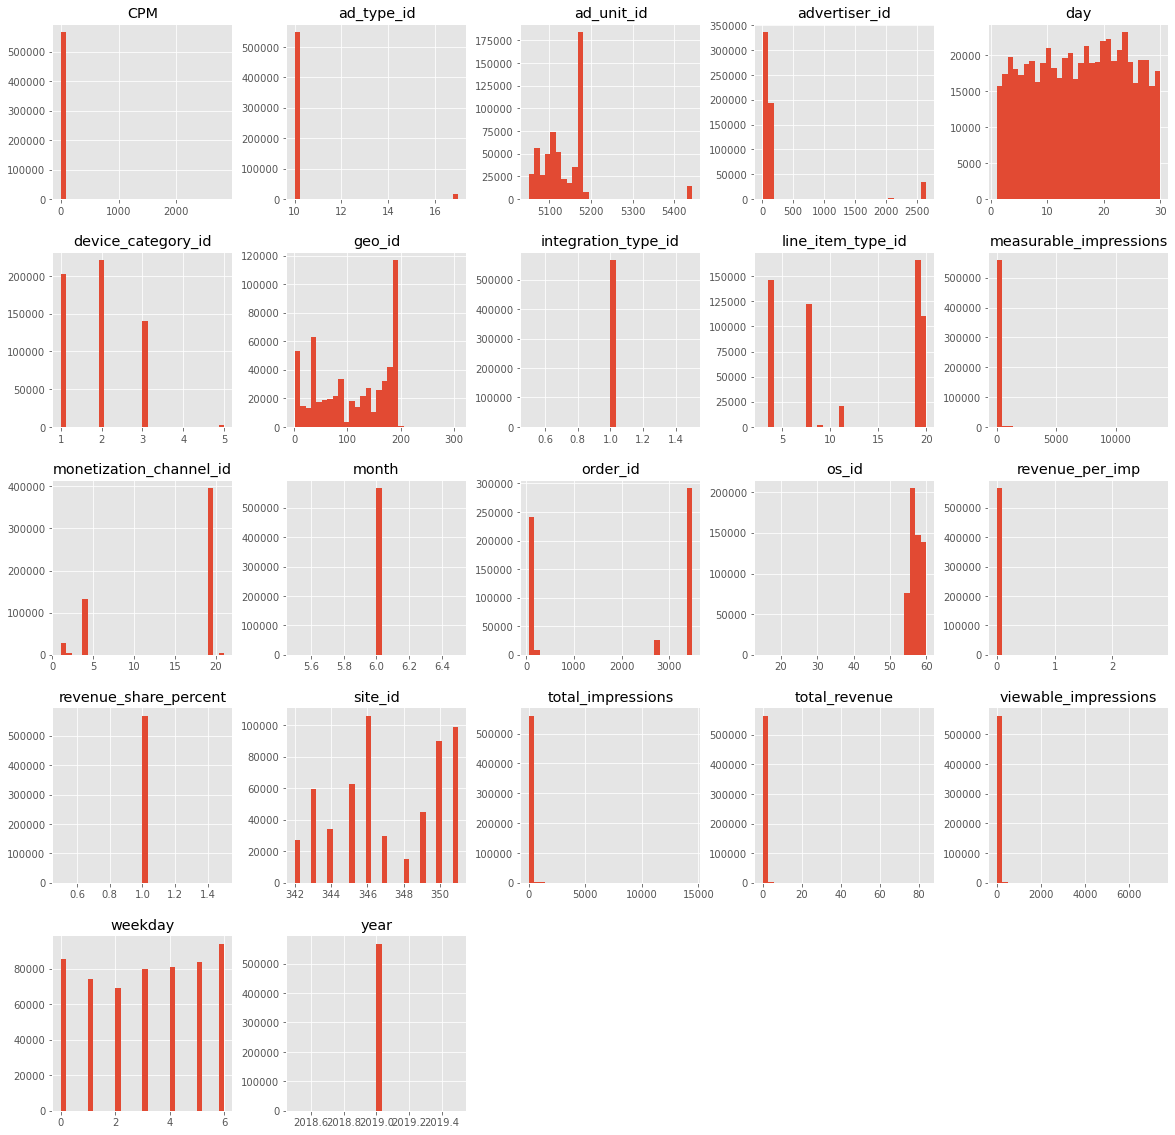

In [30]:
# Histogram
ads_df.hist(figsize=(20,20), bins=30);

Use a boxplot to check the spread of our data for each feature

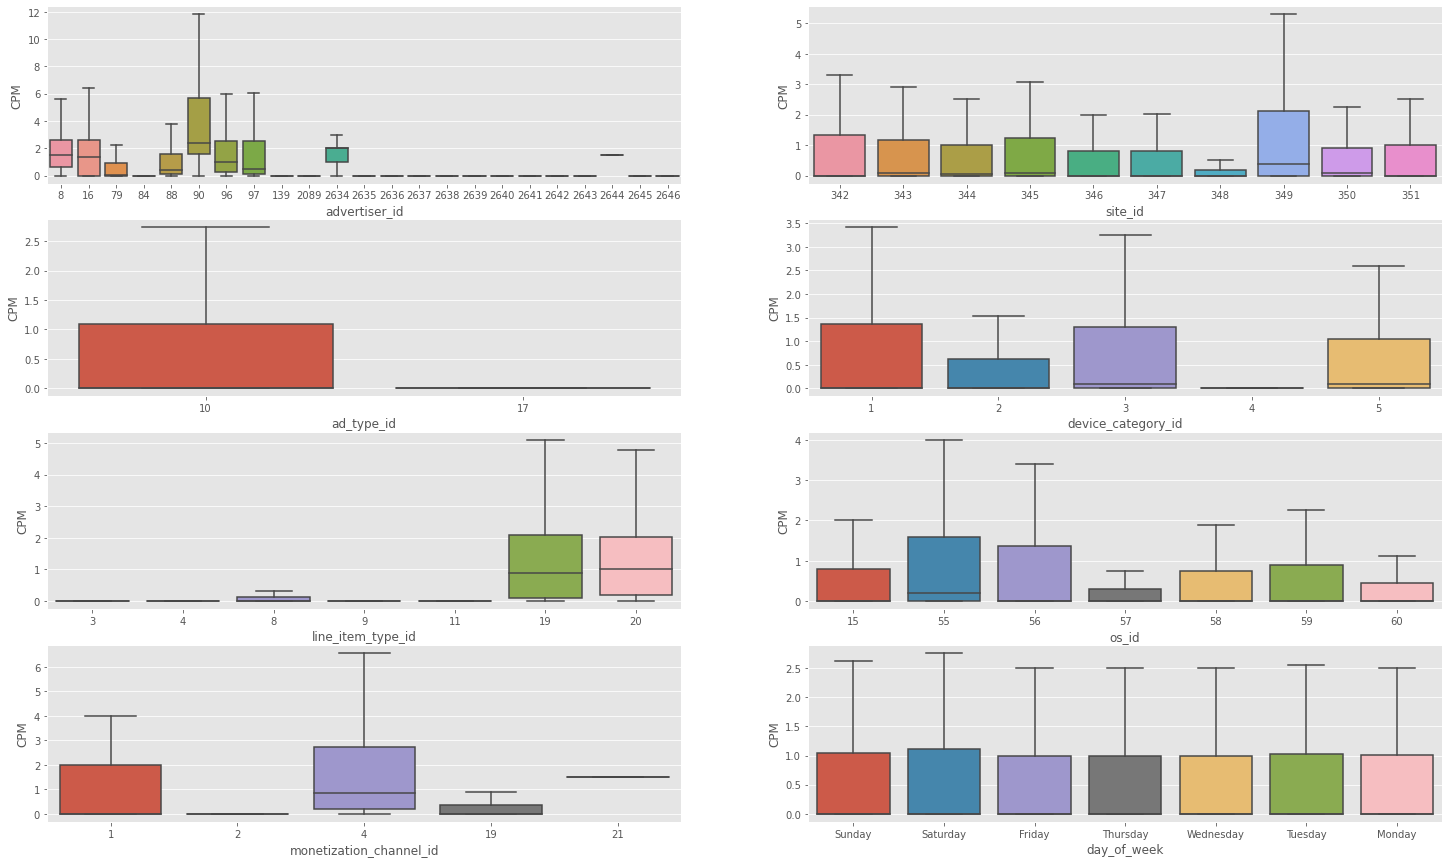

In [31]:
columns = ['advertiser_id', 'site_id', 'ad_type_id', 'device_category_id', 'line_item_type_id', 'os_id', 'monetization_channel_id','day_of_week']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 15))
for idx, feat in  enumerate(columns):
    sns.boxplot(x=feat, y='CPM', data=ads_df, ax=axes[idx // 2, idx % 2],  showfliers=False,)
    axes[idx // 2, idx % 2].set_xlabel(feat)
    axes[idx // 2, idx % 2].set_ylabel('CPM');

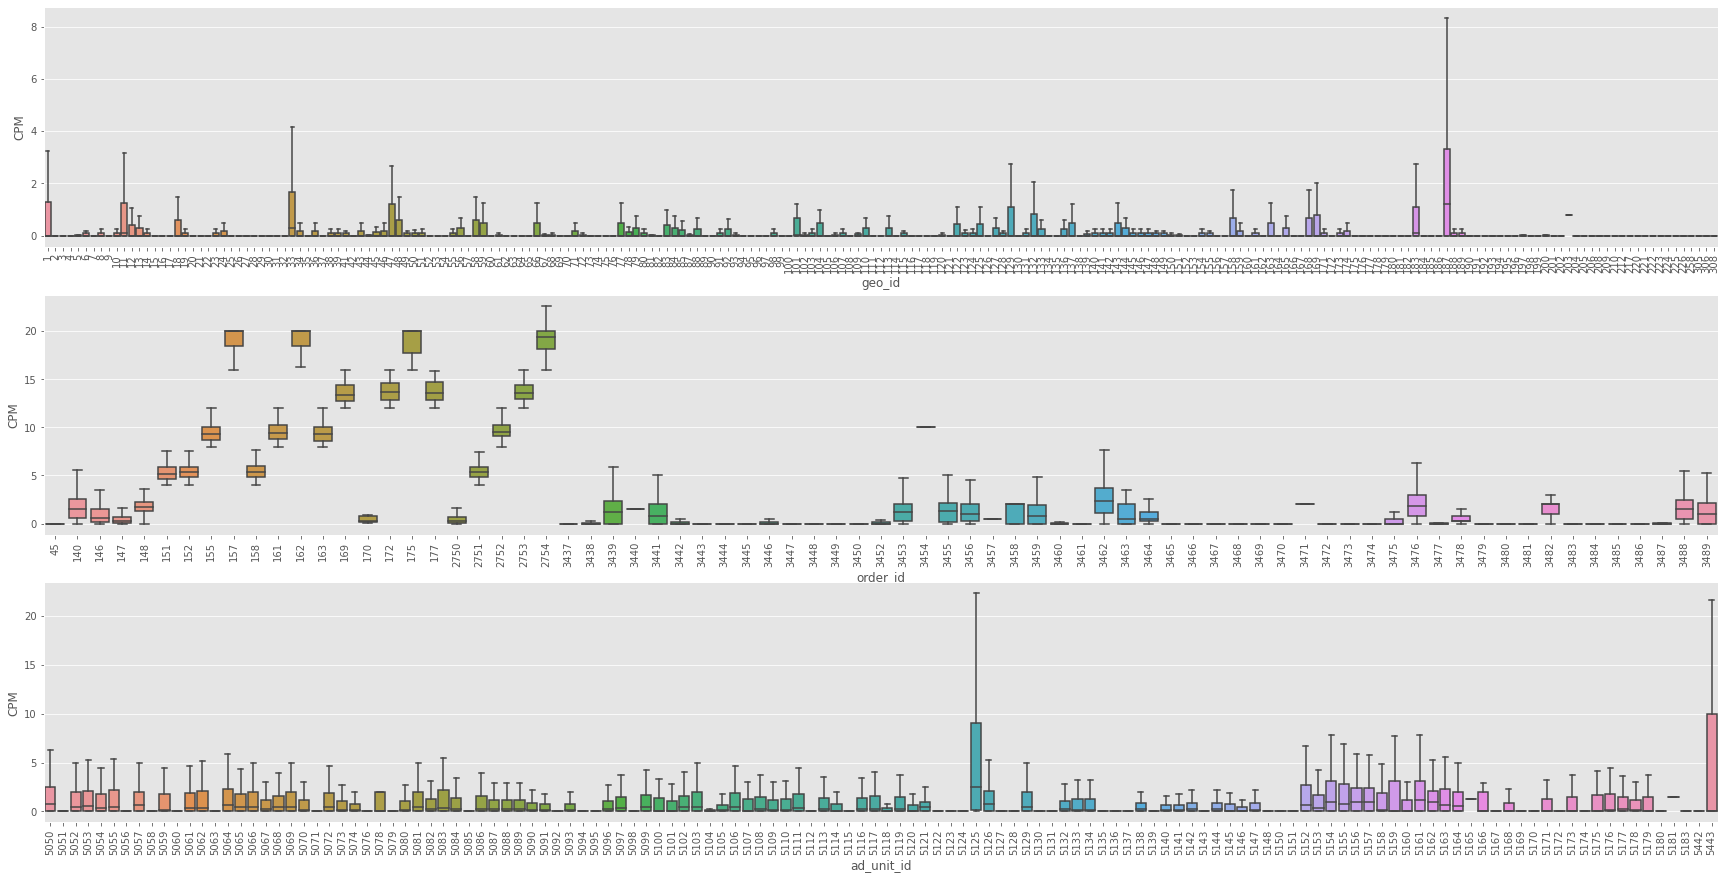

In [32]:
columns = ['geo_id',
           'order_id',
           'ad_unit_id'
          ]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 15))
for idx, feat in  enumerate(columns):
    sns.boxplot(x=feat, y='CPM', data=ads_df, ax=axes[idx], showfliers=False)
    axes[idx].set_xlabel(feat)
    axes[idx].set_ylabel('CPM');
    xax = axes[idx].xaxis
    xlabels = xax.get_ticklabels()
    for label in xlabels:
        label.set_rotation(90)

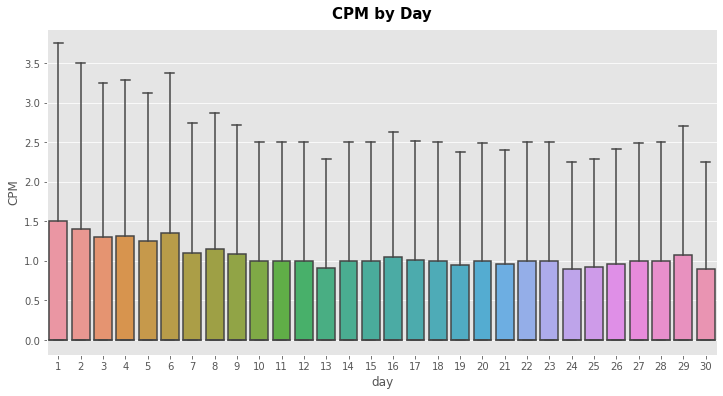

In [33]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x='day', y='CPM', data=ads_df, showfliers=False, ax=axes)
axes.set_title('CPM by Day', fontsize=15, fontweight='bold', pad=10)
xax = axes.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(0)

Display the all the Advertisers and their average CPM bids

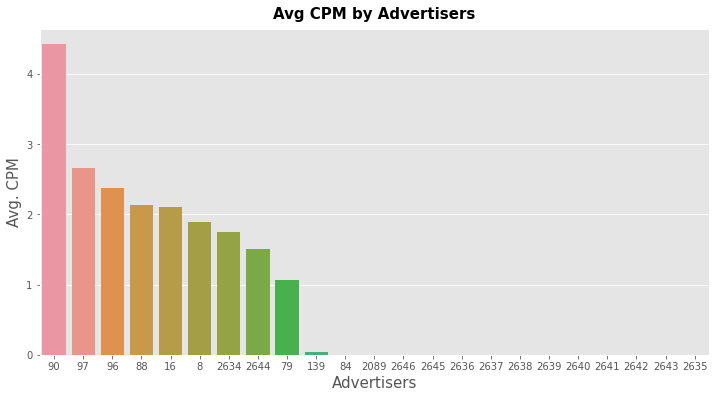

In [34]:
# Vertical Bar Chart
plt.figure(figsize=(12,6))
ax = ads_df.groupby('advertiser_id')['CPM'].mean().sort_values(ascending=False)
ax = sns.barplot(x = ax.index, y = ax, orient='v', order=ax.index)
ax.set_title('Avg CPM by Advertisers', fontsize=15, fontweight='bold', pad=10)
ax.set_ylabel('Avg. CPM', fontsize=15)
ax.set_xlabel('Advertisers', fontsize=15);

**Observations:** Advertiser id 90 is the highest bidder, followed by 2634, 8, and 2644

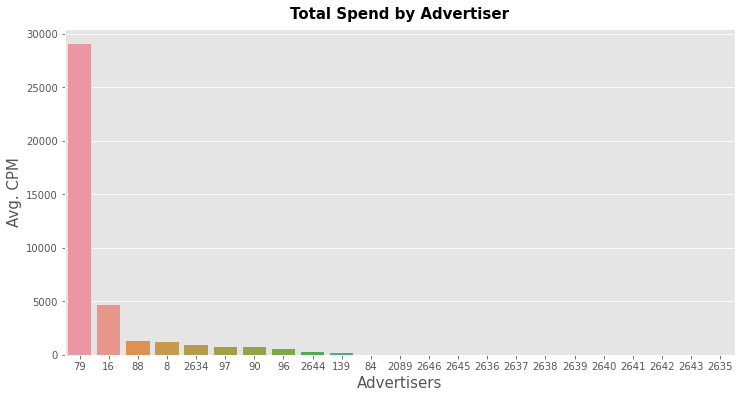

In [35]:
# Vertical Bar Chart
plt.figure(figsize=(12,6))
ax = ads_df.groupby('advertiser_id')['total_revenue'].sum().sort_values(ascending=False)
ax = sns.barplot(x = ax.index, y = ax, orient='v', order=ax.index)
ax.set_title('Total Spend by Advertiser', fontsize=15, fontweight='bold', pad=10)
ax.set_ylabel('Avg. CPM', fontsize=15)
ax.set_xlabel('Advertisers', fontsize=15);

Display all the Publishers and show the revenue they have generated

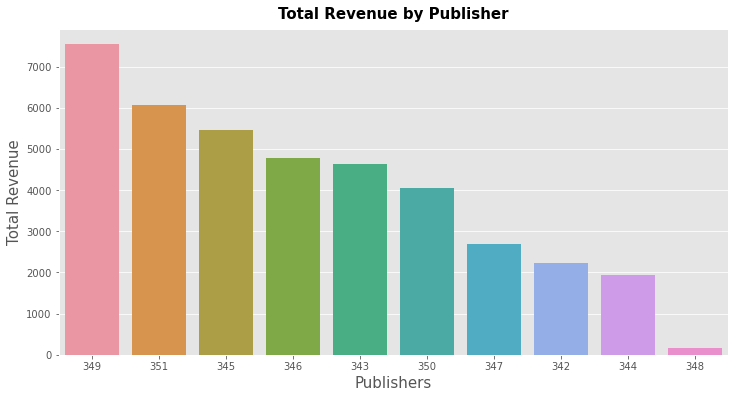

In [36]:
# Vertical Bar Chart
plt.figure(figsize=(12,6))
ax = ads_df.groupby('site_id')['total_revenue'].sum().sort_values(ascending=False)
ax = sns.barplot(x = ax.index, y = ax, orient='v', order=ax.index)
ax.set_title('Total Revenue by Publisher', fontsize=15, fontweight='bold', pad=10)
ax.set_ylabel('Total Revenue', fontsize=15)
ax.set_xlabel('Publishers', fontsize=15);

**Observation:** Publishers with site id 351, and 349 generated the most revenue in the month of June. This means advertiser's are more likely to pay these publishers to place their ads on their website

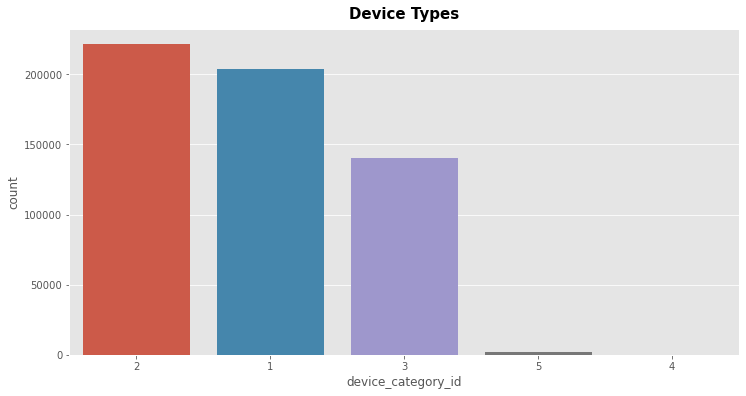

In [37]:
# Display the Top Device Types
plt.figure(figsize=(12,6))
sns.countplot(ads_df['device_category_id'], order=ads_df['device_category_id'].value_counts().index)
plt.title('Device Types', fontsize=15, pad=10, fontweight='bold');

**Observation:** There are 5 unique device types, with 2 being the highest.

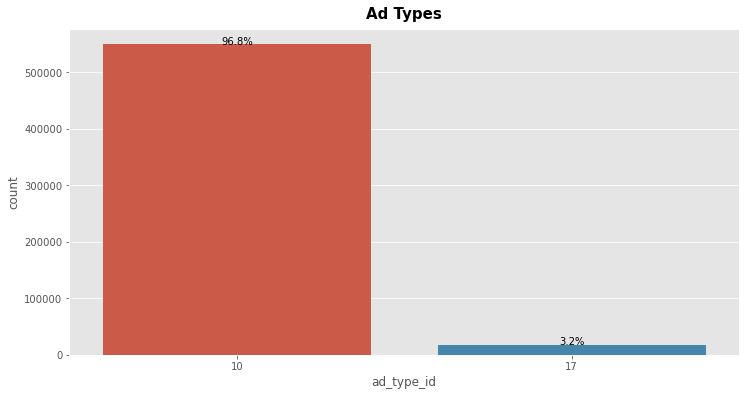

In [38]:
# Display the ad_types
f, ax = plt.subplots(1,1, figsize=(12,6))
total = len(ads_df)
sns.countplot(ads_df['ad_type_id'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(100*height/total),
            ha="center") 
plt.title('Ad Types', fontsize=15, pad=10, fontweight='bold');
plt.show();

**Observations:** 97% of the published ads are of type 10.

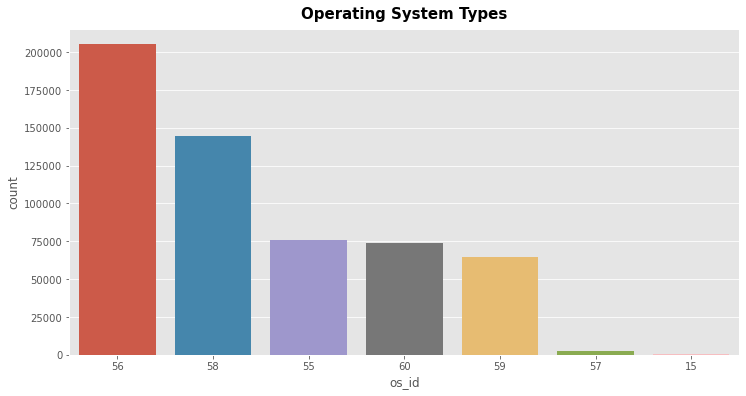

In [39]:
# Display the OS types
plt.figure(figsize=(12,6))
sns.countplot(ads_df['os_id'], order=ads_df['os_id'].value_counts().index)
plt.title('Operating System Types', fontsize=15, pad=10, fontweight='bold');

**Observations:** Most ads are served on OS with id 56 and 58. Perhaps iOS and Android?

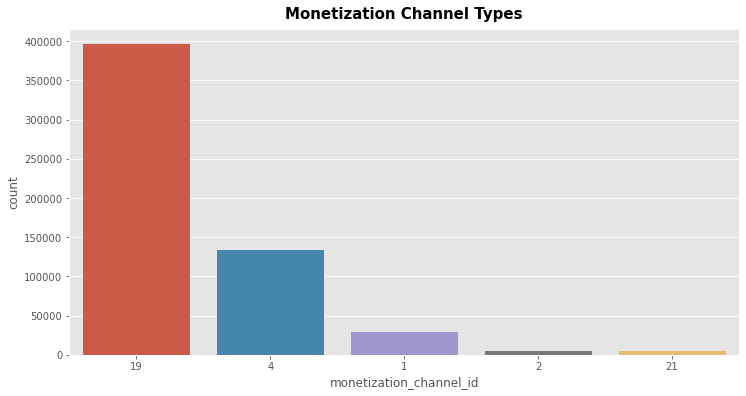

In [40]:
# Display the Montetization Channel types
plt.figure(figsize=(12,6))
sns.countplot(ads_df['monetization_channel_id'], order=ads_df['monetization_channel_id'].value_counts().index)
plt.title('Monetization Channel Types', fontsize=15, pad=10, fontweight='bold');

**Observations:** Majority of ads are served through channel 19. 

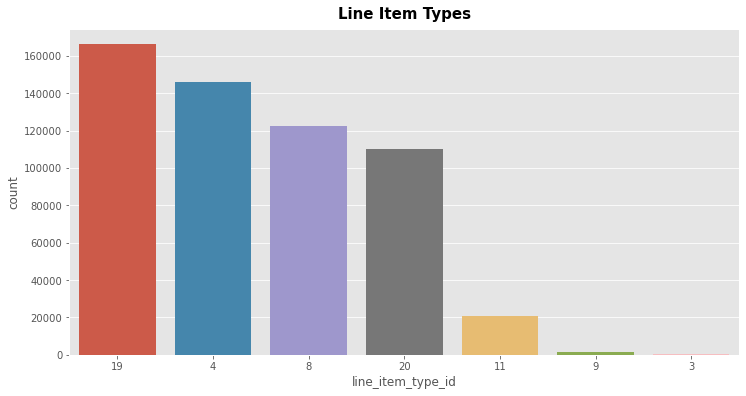

In [41]:
# Display the Line Item Types
plt.figure(figsize=(12,6))
sns.countplot(ads_df['line_item_type_id'], order=ads_df['line_item_type_id'].value_counts().index)
plt.title('Line Item Types', fontsize=15, pad=10, fontweight='bold');

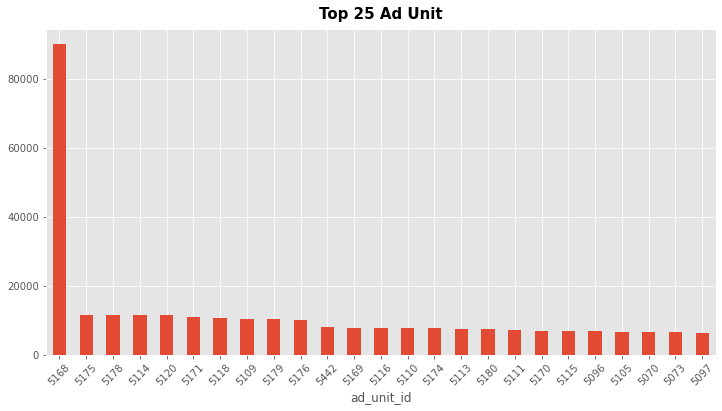

In [23]:
# Display the Ad Unit types
plt.figure(figsize=(12,6))
ax = ads_df.groupby(by='ad_unit_id')['date'].count().sort_values(ascending=False).head(25)
ax.plot(kind='bar')
plt.title('Top 25 Ad Unit', fontsize=15, pad=10, fontweight='bold')
plt.xticks(rotation=45);

**Observations:** Ad unit id 5168 serves a lot of ads

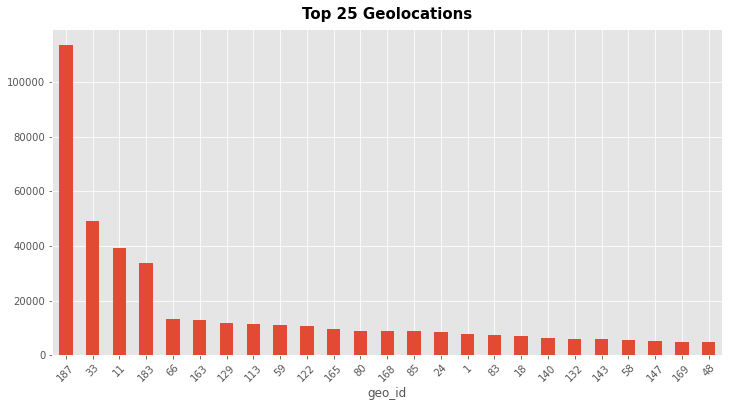

In [43]:
# Display the Ad Unit types
plt.figure(figsize=(12,6))
ax = ads_df.groupby(by='geo_id')['date'].count().sort_values(ascending=False).head(25)
ax.plot(kind='bar')
plt.title('Top 25 Geolocations', fontsize=15, pad=10, fontweight='bold')
plt.xticks(rotation=45);

**Observations:** A large amount of ads are being served in the 187 geolocation

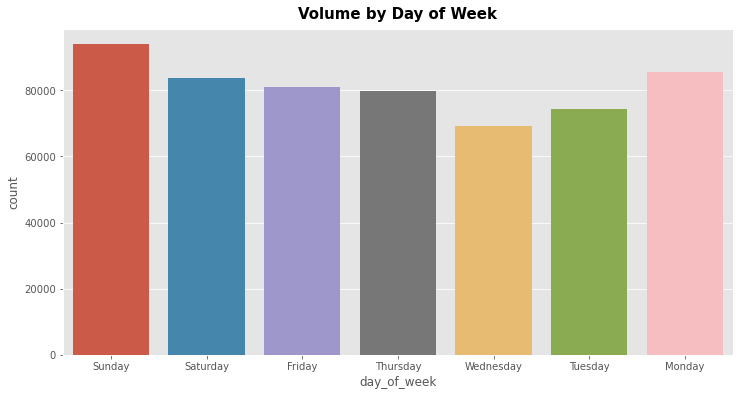

In [44]:
# Display the Ad Unit types
plt.figure(figsize=(12,6))
sns.countplot(ads_df['day_of_week'])
plt.title('Volume by Day of Week', fontsize=15, pad=10, fontweight='bold');

**Observations:** Sundays and Mondays are very popularity days for ads

#### Time Series

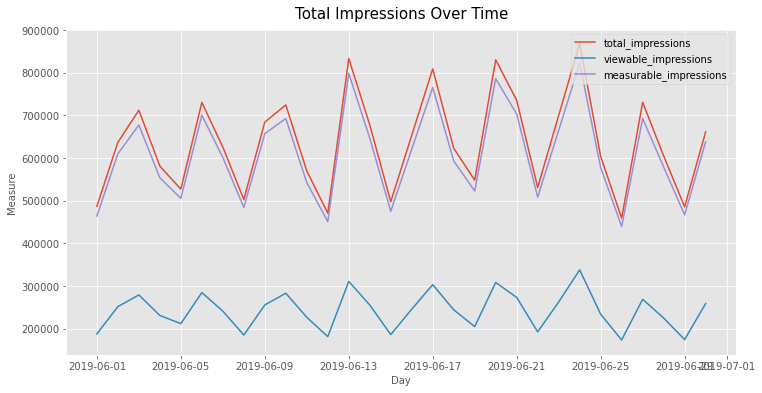

In [45]:
# Plot the impressions over time
columns = ['total_impressions', 'viewable_impressions', 'measurable_impressions']
plt.figure(figsize=(12,6))

for column in columns:
    ax = ads_df.groupby(by='date')[column].sum()
    ax = sns.lineplot(x=ax.index, y=ax, label=column)

ax.set_title('Total Impressions Over Time', fontsize=15, pad=10)
ax.legend(loc='upper right', fontsize=10)
ax.set_xlabel('Day', fontsize=10)
ax.set_ylabel('Measure', fontsize=10);

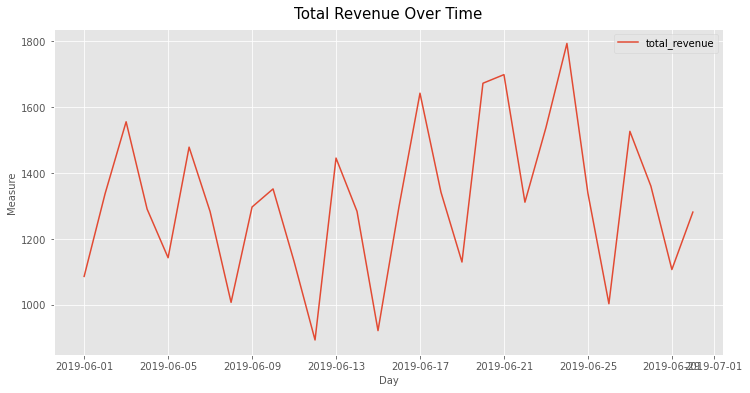

In [46]:
# Plot the revenue over time
columns = ['total_revenue']
plt.figure(figsize=(12,6))

for column in columns:
    ax = ads_df.groupby(by='date')[column].sum()
    ax = sns.lineplot(x=ax.index, y=ax, label=column)

ax.set_title('Total Revenue Over Time', fontsize=15, pad=10)
ax.legend(loc='upper right', fontsize=10)
ax.set_xlabel('Day', fontsize=10)
ax.set_ylabel('Measure', fontsize=10);

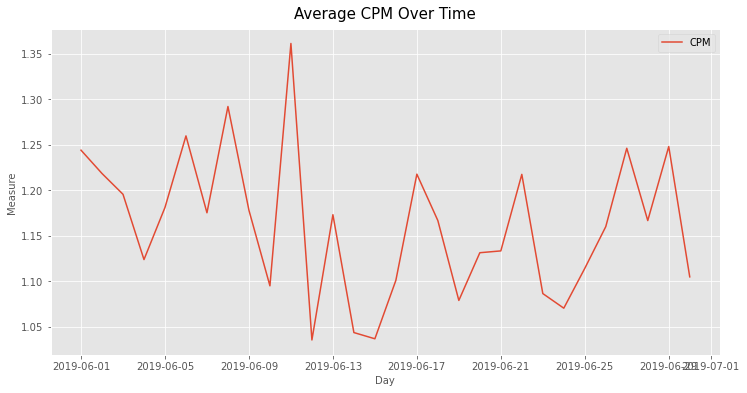

In [47]:
# Plot the CPM over time
columns = ['CPM']
plt.figure(figsize=(12,6))

for column in columns:
    ax = ads_df.groupby(by='date')[column].mean()
    ax = sns.lineplot(x=ax.index, y=ax, label=column)

ax.set_title('Average CPM Over Time', fontsize=15, pad=10)
ax.legend(loc='upper right', fontsize=10)
ax.set_xlabel('Day', fontsize=10)
ax.set_ylabel('Measure', fontsize=10);

#### Correlation

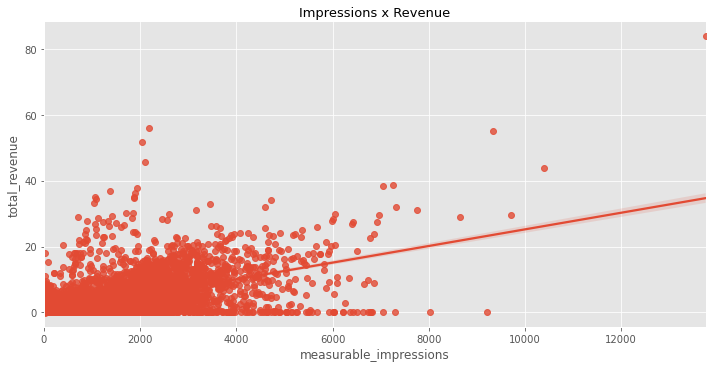

In [25]:
# Scatter Plot
sns.lmplot(x='measurable_impressions', y='total_revenue', data=ads_df, aspect=2)
plt.title('Impressions x Revenue', fontsize=13);

In [49]:
# Correlation Matrix
corr_matrix = ads_df[['site_id', 'ad_type_id', 'geo_id', 'device_category_id','advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
                      'monetization_channel_id', 'ad_unit_id','day', 'weekday', 'total_impressions', 'total_revenue','CPM']].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,monetization_channel_id,ad_unit_id,day,weekday,total_impressions,total_revenue,CPM
site_id,1.000000,0.003941,0.007077,-0.028100,0.174138,0.108671,-0.050023,-0.002319,0.056008,0.552180,-0.016768,0.004686,0.014745,-0.003210,-0.014133
ad_type_id,0.003941,1.000000,-0.016773,-0.019436,0.012788,0.166111,0.148062,0.011780,0.075799,0.258072,-0.002129,-0.002298,-0.002500,-0.006769,-0.002372
geo_id,0.007077,-0.016773,1.000000,0.078437,-0.006751,-0.030253,0.056960,0.020154,-0.079580,-0.013075,0.000977,0.006751,0.121931,0.087258,0.056099
device_category_id,-0.028100,-0.019436,0.078437,1.000000,-0.057253,0.012221,-0.003907,0.212592,0.031085,0.012862,0.005886,0.029208,-0.025461,-0.030964,-0.014829
advertiser_id,0.174138,0.012788,-0.006751,-0.057253,1.000000,0.213703,0.028907,-0.030532,-0.402578,0.078856,-0.059301,-0.007568,0.016861,-0.018701,-0.020120
order_id,0.108671,0.166111,-0.030253,0.012221,0.213703,1.000000,0.317388,0.017538,0.218456,0.014211,0.025302,0.002085,0.104783,0.068563,0.005575
line_item_type_id,-0.050023,0.148062,0.056960,-0.003907,0.028907,0.317388,1.000000,-0.034744,-0.479746,-0.091472,0.030493,0.001381,0.046244,0.047066,0.108777
os_id,-0.002319,0.011780,0.020154,0.212592,-0.030532,0.017538,-0.034744,1.000000,0.052194,0.046708,0.001736,0.019583,0.030895,0.006672,-0.025223
monetization_channel_id,0.056008,0.075799,-0.079580,0.031085,-0.402578,0.218456,-0.479746,0.052194,1.000000,0.121988,0.002850,0.001070,0.016150,0.033396,-0.079930
ad_unit_id,0.552180,0.258072,-0.013075,0.012862,0.078856,0.014211,-0.091472,0.046708,0.121988,1.000000,-0.002872,0.004195,-0.004833,-0.005789,-0.006255


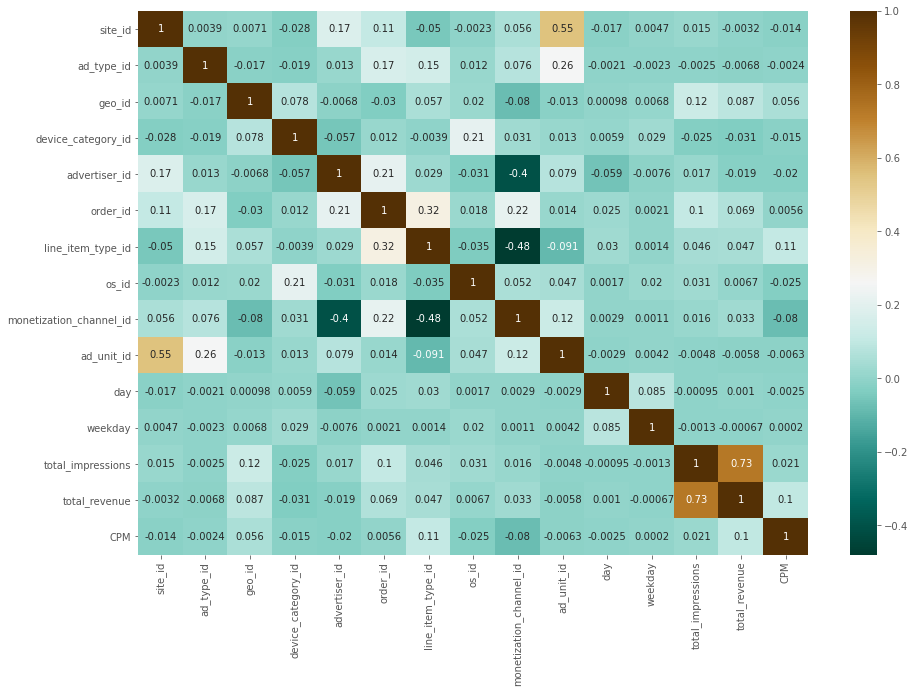

In [50]:
# Correlation Matrix Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='BrBG_r');

**Observations:** Of the features available, there isnt one that is highly correlated with CPM. Line_item_id is the leader at 0.49

# Modeling

### Pre Processing

In [30]:
# Save a copy of the original dataframe in new variable
ads_df_original = ads_df.copy()

# Filter out all oberservations with negative CPM
ads_df = ads_df[ads_df['CPM'] >= 0]

# Filter out the dataset all outliers from the dataset 
ads_df = ads_df[ads_df['CPM'] < ads_df['CPM'].quantile(0.95)]

print(ads_df_original.shape)
print(ads_df['CPM'].quantile(.95))
print(ads_df.shape)

(567291, 24)
2.771854636591467
(538924, 24)


### Feature Selection

In [31]:
ads_df.columns

Index(['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'integration_type_id', 'monetization_channel_id', 'ad_unit_id',
       'total_impressions', 'total_revenue', 'viewable_impressions',
       'measurable_impressions', 'revenue_share_percent', 'year', 'month',
       'day', 'weekday', 'day_of_week', 'revenue_per_imp', 'CPM'],
      dtype='object')

**Criteria**

- We will drop 'total_impressions', 'viewable_impressions', 'measureable_impressions', 'unfilled_impressions', and 'total_revenue' as we used these features to calculate CPM
- We will drop 'integration_type_id' and 'revenue_share_percent' because these features only contain one value
- We will drop 'date', 'year', 'month', 'day', 'weekday', 'day_of_week' because these are mainly used for EDA
- We will drop 'revenue_per_imp' because is just a proxy to 'CPM'

In [61]:
feature_list = ['advertiser_id', 
                'order_id', 
                'monetization_channel_id', 
                'line_item_type_id', 
                'site_id', 
                'ad_unit_id', 
                'ad_type_id', 
                'geo_id', 
                'device_category_id', 
                'os_id']

target_col = 'CPM'

X = ads_df[feature_list]
y = ads_df[target_col]

In [62]:
print(X.shape)
print(y.shape)

(538924, 10)
(538924,)


### Train/Test Split

Split the dataset with removed outliers to 70/30

In [63]:
train_date = datetime.datetime(2019, 6, 22)

In [68]:
X_train = ads_df[ads_df['date'] < train_date][feature_list]
y_train = ads_df.loc[ads_df['date'] < train_date][target_col]
X_test = ads_df.loc[ads_df['date'] >= train_date][feature_list]
y_test = ads_df.loc[ads_df['date'] >= train_date][target_col]

print('***** TRAIN/TEST SPLIT *****')
print('TOTAL :', X.shape, y.shape)
print('TRAIN :', X_train.shape, y_train.shape)
print('TEST  :', X_test.shape, y_test.shape)
print('')
print('Ratio : {}'.format(round(X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]),3)))

***** TRAIN/TEST SPLIT *****
TOTAL : (538924, 10) (538924,)
TRAIN : (376973, 10) (376973,)
TEST  : (161951, 10) (161951,)

Ratio : 0.699


### ML Models

In [27]:
# Machine Learning
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor

# ML helper functions
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [28]:
models = ['DecisionTreeRegressor', 'RandomForest Regression'] 
#models = ['DecisionTreeRegressor', 'RandomForestRegressor', 'LGBMRegressor', 'CatBoostRegressor', 'XGBRFRegressor' ] 

### Decision Tree Regressor

CART Regressor (scikit-learn). Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Decision trees are effective for learning non-linear functions, and are particular adept at finding threshold effects.

In [29]:
# max_depth=2 was best, so fit a tree using that parameter.
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
print("Accuracy Score: {}".format(round(tree_reg.score(X_test, y_test),5)))

NameError: name 'X_train' is not defined

In [81]:
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

print("TRAIN MSE : {}".format(round(mean_squared_error(y_train, y_train_pred),5)))
print("TEST MSE  : {}".format(round(mean_squared_error(y_test, y_test_pred),5)))

TRAIN MSE : 0.21489
TEST MSE  : 0.36004


In [82]:
# Compute feature importances.
feature_importance = pd.DataFrame({'feature':feature_list, 'importance':tree_reg.feature_importances_}).sort_values(by='importance')
feature_importance

,feature,importance
2,monetization_channel_id,0.002989
4,site_id,0.007503
8,device_category_id,0.012243
0,advertiser_id,0.015589
9,os_id,0.028940
6,ad_type_id,0.043919
7,geo_id,0.143569
5,ad_unit_id,0.156970
1,order_id,0.263732
3,line_item_type_id,0.324545


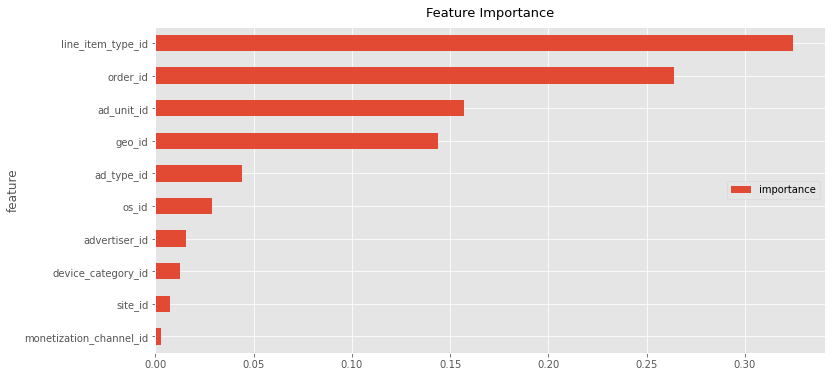

In [83]:
# Plot the feature importance
ax = feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(12,6))
ax.set_title("Feature Importance", fontsize=13, pad=10)
ax.legend(loc='center right');

In [79]:
# Plot the Decision Tree
dot_data = export_graphviz(tree_reg, out_file=None, feature_names=feature_list, class_names='CPM', filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

NameError: name 'graphviz' is not defined

#### Paramater Tuning

In [114]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 40))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_dept
for depth in max_depth_range:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=1234)
    MSE_scores = cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [ ]:
# Plot max_depth (x-axis) versus RMSE (y-axis). 20
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [ ]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))#[0]

### Random Forest Regressor
Tree-based algorithm Preprocessing. Random forests are an ensemble method where hundreds (or thousands) of individual decision trees are fit to boostrap re-samples of the original dataset, with each tree being allowed to use a random selection of N variables, where N is the major configurable parameter of this algorithm.

Ensembling many re-sampled decision trees serves to reduce their variance, producing more stable estimators that generalize well out-of-sample. Random forests are extrememly hard to over-fit, are very accurate, generalize well, and require little tuning, all of which are desirable properties in a predictive algorithm.

<img src="https://www.researchgate.net/profile/Evaldas_Vaiciukynas/publication/301638643/figure/fig1/AS:355471899807744@1461762513154/Architecture-of-the-random-forest-model.png" width="700" height="700" align="left"/>

In [89]:
#Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators = 30, random_state = 42)
rf_reg.fit(X_train,y_train)

y_pred = rf_reg.predict(X_test)
#print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

In [92]:
print('MSE Score: {}'.format(round(mean_squared_error(y_test, y_pred),4)))

MSE Score: 0.3418


In [115]:
# Compute feature importance
feature_importance = pd.DataFrame({'feature': feature_list, 'importance': rf_reg.feature_importances_}).sort_values('importance').reset_index(drop=True)
feature_importance

,feature,importance
0,monetization_channel_id,0.003550
1,site_id,0.007115
2,device_category_id,0.013796
3,advertiser_id,0.019348
4,os_id,0.029921
5,ad_type_id,0.046183
6,geo_id,0.149402
7,ad_unit_id,0.161722
8,order_id,0.251541
9,line_item_type_id,0.317421


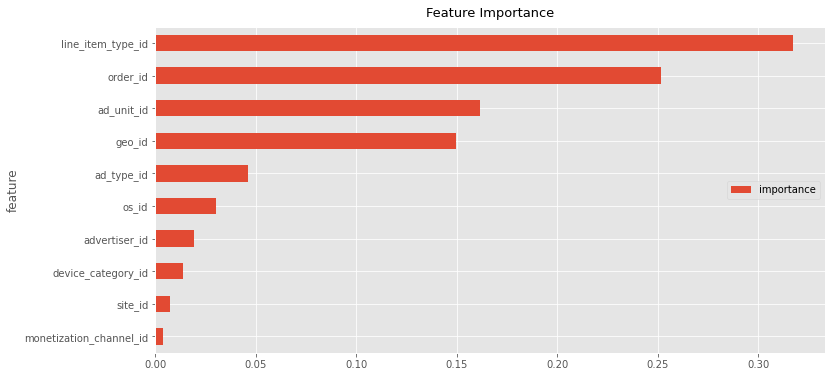

In [116]:
# Plot the feature importance
ax = feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(12,6))
ax.set_title("Feature Importance", fontsize=13, pad=10)
ax.legend(loc='center right');

#### Parameter Tuning

In [110]:
# Find the average RMSE
scores = cross_val_score(rf_reg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.5467784181382385

In [112]:
# List of values to try for n_estimators:
estimator_range = list(range(10, 310, 10))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use five-fold cross-validation with each value of n_estimators (Warning: Slow!).
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [111]:
# Interpreation: On average, our predicted value will vary from our actual price by $xxx


### Predictor (using Streamlit)
Create a webapp using streamlit to allow users to select an advertiser, website, ad_unit_id, and ad_type_id to get a predicted reserve CPM prise. The real-time ad bidding price predictor will take in the following inputs to determine what the reserve price should be set at:

**base_price_predictor** = ('geo_id', 'advertiser_id', 'ad_unit_id', 'monetization_channel_id', 'os_id', 'device_category_id', 'site_id', 'ad_type_id')


- **geo_id** (geographic location - CA, NY, FL, TX)
- **advertiser_id** (advertiser - Chase, BofA, Wells Fargo, Citi)
- **ad_unit_id** (placement on website - Top Banner, Left/Right Rail, In-content, Bottom Banner)
- **monetization_channel_id** (demand vs supply integration - exchange, direct, etc)
- **os_id** (operating systemm - MacOSx, Windows, Android, iOS)
- **device_category_id** (device type of user - desktop , mobile, tablet)
- **site_id** (publisher websites - MSN.com, CNN.com, MSBC.com, MarketWatch.com)
- **ad_type_id** (ad type - display ads , video ads, text ads, etc.)
- **line_item_type_id**: (Sponsorship, Standard, Network)
- **order_id**: (Advertiser's campaign)

### Closing Remarks

Programmatic advertising uses your predicted value CPM rates to select the highest bidder. When your value CPMs are outdated, your networks could be competing with incorrect rates, preventing you from maximizing ad revenue. With this predictor, you could increase your revenue by updating your value CPM rates at least once per month. You can run optimization tests to determine what the "sweet spot" for your CPM rates are to maximize revenue.

### Next Steps & Ideas

- All observations with line_item_type = 3, 9, 11 all receive impressions but no revenue. We can try to exclude these observations to improve the accuracy of our model.
- Deploy model to production enviornment to introduce new unseen data and track prediction CPM vs actual CPM accuracy over time (Daily, Weekly cadence)
- Attempt to fix the data with other ml algorithms such as XGB, LGB, and CAT to compare model performance
- Create mapping function to apply "ficticous labels" to numeric IDs
- Build a recommendation engine to determine which ads shoud be served on which publisher and placement given X, Y, Z feature using XX, YY, ZZ Algorithm/ML Model

# Parking Lot

In [ ]:
# Some questions to think through as we are analyzing the dataset
# How many advertisers are there in the dataset?
# How many orders are there for 
# How many line items are there in the dataset?
# How many types of monteization channels are there?
# How many publisher websites are available to serve ads?
# How many different type of ads are available to be served?
# How many different type of ad units are there?
# How many unique geographic locations were the ads served in?
# How many device types arer there?
# What kind of operating systems are ads most served on?
# What is the min and max impressions that are served per day?
# How much revenue does a publisher make per day? What is the CPM?

#### Models

In [1]:
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
models = {'LGBM': LGBMRegressor(objective='mse', n_jobs=-1),
          'CatBoost': CatBoostRegressor(objective='RMSE', verbose=0),
          'XGB': XGBRFRegressor(objective='reg:squarederror'),
          'RandomForest': RandomForestRegressor(criterion='mse', n_jobs=-1)
         }

In [3]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model: {}, Score: {}".format(name, mean_squared_error(y_test, y_pred)))

NameError: name 'X_train' is not defined

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model: {}, Score: {}".format(name, np.sqrt(mean_squared_error(y_test, y_pred))))

**Interpretation:**

#### Save Copy of Data Locally

In [ ]:
# Save new copy of filtered dataset
# Save a copy of the processed data locally
ads_df.to_csv('../data/rtb-ad-dataset-processed-no-outliers-{}.csv'.format(datetime.date.today()))
print('File successfully saved on {}.'.format(datetime.date.today()))